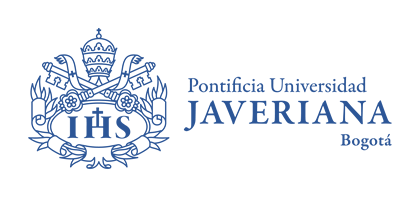


# Proyecto IA

## Contexto

## Librerías necesarias

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [46]:
%pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Datos

### Datos IPC

In [47]:
# Leer un excel con pandas desde la fila 17
df_ipc = pd.read_excel('data/IPC_Por_ciudad_IQY.xlsx',skiprows=range(0,2))
df_ipc

,Fecha,"Bogotá, D.C.",Cali,Medellín,Barranquilla,Armenia,Bucaramanga,Cartagena De Indias,Cúcuta,Florencia,...,Pasto,Pereira,Popayán,Riohacha,Santa Marta,Sincelejo,Tunja,Valledupar,Villavicencio,Otras Areas Urbanas
0,1979-01-31 00:00:00,0.54,0.66,0.55,0.59,NaN,0.51,NaN,NaN,NaN,...,0.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1979-02-28 00:00:00,0.55,0.66,0.55,0.61,NaN,0.54,NaN,NaN,NaN,...,0.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1979-03-31 00:00:00,0.57,0.69,0.57,0.63,NaN,0.56,NaN,NaN,NaN,...,0.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1979-04-30 00:00:00,0.58,0.7,0.58,0.65,NaN,0.56,NaN,NaN,NaN,...,0.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1979-05-31 00:00:00,0.6,0.71,0.6,0.66,NaN,0.58,NaN,NaN,NaN,...,0.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182,Fuente: Departamento Administrativo Nacional d...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2184,(-) Indica que no hay dato disponible.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
ciudades = df_ipc.columns[1:23].tolist()
ciudades

['Bogotá, D.C.',
 'Cali',
 'Medellín',
 'Barranquilla',
 'Armenia',
 'Bucaramanga',
 'Cartagena De Indias',
 'Cúcuta',
 'Florencia',
 'Ibagué',
 'Manizales',
 'Montería',
 'Neiva',
 'Pasto',
 'Pereira',
 'Popayán',
 'Riohacha',
 'Santa Marta',
 'Sincelejo',
 'Tunja',
 'Valledupar',
 'Villavicencio']

### Datos Temperatura

Se necesitan los datos de longitud y latitud de las ciudades en el dataframe del IPC para hallar los valores de tempartura, humedad y precipitación.

Los datos de coordenadas geográficas de longitud y latitud se obtuvieron de: https://www.geodatos.net/coordenadas/colombia/


In [49]:
city_coordinates = {
    'Bogotá, D.C.': {'lat': 4.60971, 'lon': -74.08175},
    'Cali': {'lat': 3.43722, 'lon': -76.5225},
    'Medellín': {'lat': 6.25184, 'lon': -75.56359},
    'Barranquilla': {'lat': 10.96854, 'lon': -74.78132},
    'Armenia': {'lat': 4.53389, 'lon': -75.68111},
    'Bucaramanga': {'lat': 7.12539, 'lon': -73.1198},
    'Cartagena De Indias': {'lat': 10.39972, 'lon': -75.51444},
    'Cúcuta': {'lat': 7.89391, 'lon': -72.50782},
    'Florencia': {'lat': 1.61438, 'lon': -75.60623},
    'Ibagué': {'lat': 4.43889, 'lon': -75.23222},
    'Manizales': {'lat': 5.06889, 'lon': -75.51738},
    'Montería': {'lat': 8.74798, 'lon': -75.88143},
    'Neiva': {'lat': 2.9273, 'lon': -75.28189},
    'Pasto': {'lat': 1.21361, 'lon': -77.28111},
    'Pereira': {'lat': 4.81333, 'lon': -75.69611},
    'Popayán': {'lat': 2.43823, 'lon': -76.61316},
    'Riohacha': {'lat': 11.54444, 'lon': -72.90722},
    'Santa Marta': {'lat': 11.24079, 'lon': -74.19904},
    'Sincelejo': {'lat': 9.30472, 'lon': -75.39778},
    'Tunja': {'lat': 5.53528, 'lon': -73.36778},
    'Valledupar': {'lat': 10.46314, 'lon': -73.25322},
    'Villavicencio': {'lat': 4.142, 'lon': -73.62664}
}

#período de tiempo
start_date = '20100101' #2010-01-01
end_date = '20240331' #2024-03-31

In [50]:
# Variables a recuperar (temperatura y precipitación)
parameters = ['T2M_MAX', 'T2M_MIN', 'RH2M', 'PRECTOTCORR','T2M','WS10M']
parameters_subset = ','.join(parameters)

In [51]:
# Obtención de datos
for ciudad, coords in city_coordinates.items():
    lat, lon = coords['lat'], coords['lon']
    url = f'https://power.larc.nasa.gov/api/temporal/daily/point?parameters={parameters_subset}&community=SB&longitude={lon}&latitude={lat}&start={start_date}&end={end_date}&format=CSV'
    response = requests.get(url)
    data = response.text
    data_parts = data.split('-END HEADER-')
    actual_data = data_parts[1].strip()
    with open(f'data/temp_diaria_{ciudad}.csv', 'w') as f:
        f.write(actual_data)
    df = pd.read_csv(f'data/temp_diaria_{ciudad}.csv')
    print(f'Datos para {ciudad}:')
    print(df.head())

Datos para Bogotá, D.C.:
   YEAR  MO  DY  T2M_MAX  T2M_MIN   RH2M  PRECTOTCORR    T2M  WS10M
0  2010   1   1    26.90    12.31  54.62          0.0  18.78   1.82
1  2010   1   2    27.57    12.08  52.69          0.0  18.80   1.88
2  2010   1   3    27.47     9.58  48.19          0.0  17.93   2.55
3  2010   1   4    27.99    10.55  48.12          0.0  18.88   2.14
4  2010   1   5    27.99    12.64  52.38          0.0  20.31   1.54
Datos para Cali:
   YEAR  MO  DY  T2M_MAX  T2M_MIN   RH2M  PRECTOTCORR    T2M  WS10M
0  2010   1   1    24.81    10.76  72.06         0.09  17.06   1.38
1  2010   1   2    25.51    10.99  71.56         0.07  16.98   1.46
2  2010   1   3    25.72     8.23  67.56         0.01  16.57   2.05
3  2010   1   4    25.63     9.16  66.44         0.00  17.08   2.50
4  2010   1   5    23.83    10.87  74.81         0.00  17.05   1.45
Datos para Medellín:
   YEAR  MO  DY  T2M_MAX  T2M_MIN   RH2M  PRECTOTCORR    T2M  WS10M
0  2010   1   1    22.24    10.60  80.62         2.19

## Preparación de Datos

### Datos IPC

In [52]:
def convert_to_datetime(df_ipc, column):
    """
    Convierte una columna de un DataFrame a datetime y la establece como índice.
    Args:
        df_ipc (DataFrame): El DataFrame.
        column (str): El nombre de la columna a convertir.
    Returns:
        DataFrame: El DataFrame con la columna convertida a datetime y establecida como índice.
    """
    # Convertir la columna a datetime
    df_ipc[column] = pd.to_datetime(df_ipc[column])

    # Dejar solo el mes y el año
    df_ipc[column] = df_ipc[column].dt.to_period('M')

    # Establecer la columna como índice
    df_ipc.set_index(column, inplace=True)

    return df_ipc

Hacer un diccionario de cada ciudad con su IPC, IPC año corrido, IPC anual e IPC mensual. Todos desde el 2010

In [53]:
# Diccionario para almacenar los DataFrames
cities_dict = {}


IPC = convert_to_datetime(df_ipc.iloc[:543, :-1].copy(), 'Fecha')
IPC.columns = [f"{col}" for col in IPC.columns]
IPC = IPC.loc['2010':]

IPC_var_anio_corr = convert_to_datetime(df_ipc.iloc[546:1089, :-1].copy(), 'Fecha')
IPC_var_anio_corr.columns = [f"{col}" for col in IPC_var_anio_corr.columns]
IPC_var_anio_corr = IPC_var_anio_corr.loc["2010":]

IPC_anual = convert_to_datetime(df_ipc.iloc[1092:1635, :-1].copy(), 'Fecha')
IPC_anual.columns = [f"{col}" for col in IPC_anual.columns]
IPC_anual = IPC_anual.loc["2010":]

IPC_mensual = convert_to_datetime(df_ipc.iloc[1638:2181, :-1].copy(), 'Fecha')
IPC_mensual.columns = [f"{col}" for col in IPC_mensual.columns]
IPC_mensual = IPC_mensual.loc["2010":]

In [54]:
for city in ciudades:
    #Obtain IPC data for each city
    cities_dict[city] = {}
    IPC_city = IPC[[city]]
    IPC_var_anio_corr_city = IPC_var_anio_corr[[city]]
    IPC_anual_city = IPC_anual[[city]]
    IPC_mensual_city = IPC_mensual[[city]]
    
    # Update IPC sufixes
    IPC_city.columns = ["IPC_"+str(col) for col in IPC_city.columns]
    IPC_anual_city.columns = ["IPC_Año_"+str(col) for col in IPC_anual_city.columns]
    IPC_mensual_city.columns = ["IPC_Mes_"+str(col) for col in IPC_mensual_city.columns]
    IPC_var_anio_corr_city.columns = ["IPC_Año_corr_"+str(col) for col in IPC_var_anio_corr_city.columns]
    
    
    # Save it in the dictionary
    merged_ipcs = pd.concat([IPC_city, IPC_var_anio_corr_city, IPC_anual_city, IPC_mensual_city], axis=1)
    cities_dict[city]["to_merge"] = [merged_ipcs]
        

### Datos Temperatura

In [55]:
for ciudad in city_coordinates.keys():
    df = pd.read_csv(f'data/temp_diaria_{ciudad}.csv')
    print(f'Datos para {ciudad}:')
    print(df.head())

Datos para Bogotá, D.C.:
   YEAR  MO  DY  T2M_MAX  T2M_MIN   RH2M  PRECTOTCORR    T2M  WS10M
0  2010   1   1    26.90    12.31  54.62          0.0  18.78   1.82
1  2010   1   2    27.57    12.08  52.69          0.0  18.80   1.88
2  2010   1   3    27.47     9.58  48.19          0.0  17.93   2.55
3  2010   1   4    27.99    10.55  48.12          0.0  18.88   2.14
4  2010   1   5    27.99    12.64  52.38          0.0  20.31   1.54
Datos para Cali:
   YEAR  MO  DY  T2M_MAX  T2M_MIN   RH2M  PRECTOTCORR    T2M  WS10M
0  2010   1   1    24.81    10.76  72.06         0.09  17.06   1.38
1  2010   1   2    25.51    10.99  71.56         0.07  16.98   1.46
2  2010   1   3    25.72     8.23  67.56         0.01  16.57   2.05
3  2010   1   4    25.63     9.16  66.44         0.00  17.08   2.50
4  2010   1   5    23.83    10.87  74.81         0.00  17.05   1.45
Datos para Medellín:
   YEAR  MO  DY  T2M_MAX  T2M_MIN   RH2M  PRECTOTCORR    T2M  WS10M
0  2010   1   1    22.24    10.60  80.62         2.19

Sacar el promedio de los indices de temperatura, humedad etc. Por mes y año, para luego poderlos cruzar con el IPC.

In [56]:
for ciudad in city_coordinates.keys():
    df = pd.read_csv(f'data/temp_diaria_{ciudad}.csv')
    df_mean=df.groupby(["YEAR","MO"]).mean()
    df_mean = df_mean.reset_index()
    
    df_mean["Fecha"] = pd.to_datetime(dict(year=df_mean['YEAR'], month=df_mean['MO'], day=df_mean['DY']))
    
    df_correct_date = convert_to_datetime(df_mean.copy(),"Fecha")
    
    df_correct_date.drop(['YEAR', 'MO', 'DY'], axis=1, inplace=True)
    
    df_correct_date.columns = [f"{str(col)}_{ciudad}" for col in df_correct_date.columns]
    cities_dict[ciudad]["to_merge"].append(df_correct_date)

In [57]:
for city, dfs in cities_dict.items():
    df_ipc,df_weather = dfs["to_merge"]
    cities_dict[city]["merged"] = df_ipc.join( df_weather)

In [60]:
cities_dict["Neiva"]["merged"]

,IPC_Neiva,IPC_Año_corr_Neiva,IPC_Año_Neiva,IPC_Mes_Neiva,T2M_MAX_Neiva,T2M_MIN_Neiva,RH2M_Neiva,PRECTOTCORR_Neiva,T2M_Neiva,WS10M_Neiva
Fecha,,,,,,,,,,
2010-01,73.17,0.58,2.69,0.58,29.160645,16.627419,66.133871,0.308065,21.875161,2.750000
2010-02,73.73,1.36,3.1,0.77,29.632500,18.466429,67.959643,1.274643,23.156429,2.861786
2010-03,73.79,1.44,2.58,0.08,28.434839,18.032903,73.184839,2.984839,22.306452,2.820968
2010-04,74.08,1.84,2.68,0.39,25.628667,17.539333,82.152667,8.171667,20.886333,2.468667
2010-05,74.36,2.22,2.89,0.37,24.181613,16.968065,86.241613,9.566774,20.122903,2.273226
...,...,...,...,...,...,...,...,...,...,...
2023-11,137.24,7.88,9.4,0.23,25.591000,17.066000,81.062667,3.494000,20.664667,2.322667
2023-12,137.53,8.11,8.11,0.21,26.244194,17.478710,80.604194,4.420000,21.184839,2.511290
2024-01,138.92,1.01,7.48,1.01,28.046452,17.181935,74.010968,0.810645,21.698387,2.687742
